In [5]:
from pandas import read_csv 
import numpy as np

In [6]:
df = read_csv('international-airline-passengers.csv', usecols=[1])
df.describe()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
values = df.values.astype('float32')
values.shape

(144, 1)

In [8]:
train_size = int((values.shape[0] * 0.67))
test_size = values.shape[0]  - train_size
train = values[0:train_size]
test = values[train_size:]

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
train = scaler.fit_transform(train)
test = scaler.transform(test)
test.shape,train.shape

((48, 1), (96, 1))

In [10]:
def create_dataset(data, k):
    dataX, dataY = [],[]
    for i in range(data.shape[0] - k):
        x = data[i:i + k, 0]
        y = data[i + k, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [11]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [12]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
trainX.shape

(84, 12, 1)

In [25]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [26]:
model = Sequential()
model.add(SimpleRNN(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size = 1)
model.count_params()

Epoch 1/10
84/84 [==============================] - 0s 5ms/step - loss: 0.0362
Epoch 2/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 3/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0073
Epoch 4/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 5/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 6/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 7/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 8/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 9/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 10/10
84/84 [==============================] - 0s 2ms/step - loss: 0.0056


29

In [27]:
testPredict=model.predict(testX)
testPredict=scaler.inverse_transform(testPredict).ravel()
trainPredict=model.predict(trainX)
trainPredict=scaler.inverse_transform(trainPredict).ravel()
testTrue=scaler.inverse_transform([testY]).ravel()
trainTrue=scaler.inverse_transform([trainY]).ravel()

In [28]:
from matplotlib import pyplot as plt

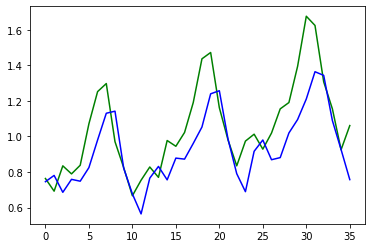

In [29]:
plt.plot(testTrue,c="g")
plt.plot(testPredict,c='b')
plt.show()

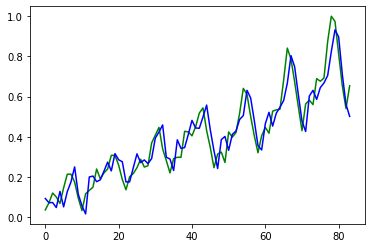

In [30]:
plt.plot(trainTrue,c="g")
plt.plot(trainPredict,c='b')
plt.show()

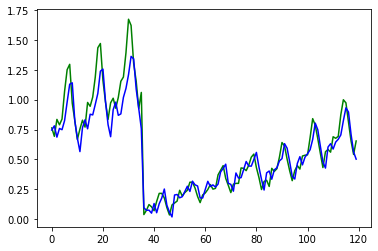

In [32]:
combinePredict=np.concatenate((testPredict,trainPredict))
combineTrue=np.concatenate((testTrue,trainTrue))
plt.plot(combineTrue,c="g")
plt.plot(combinePredict,c='b')
plt.show()